# The Dungeon Master's Guide to Clustering

### Import Libraries

In [1]:
%matplotlib notebook 
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

In [2]:
sns.set(style = "darkgrid")

### Import Dataset

In [3]:
DF_monsters = pd.read_csv('monsters.csv')  

<IPython.core.display.Javascript object>


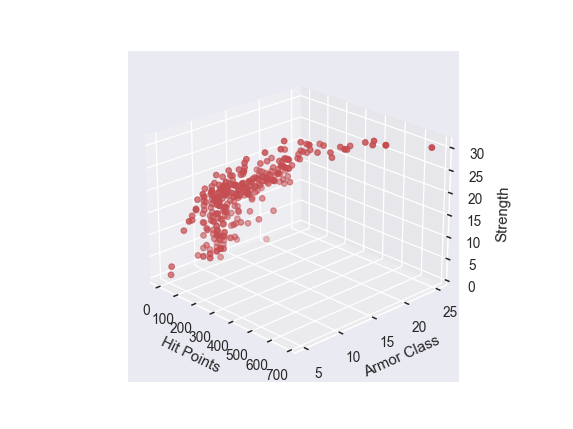

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = DF_monsters['hit_points']
y = DF_monsters['armor_class']
z = DF_monsters['strength']

ax.set_xlabel("Hit Points")
ax.set_ylabel("Armor Class")
ax.set_zlabel("Strength")

ax.scatter(x, y, z,c='r')

plt.show()

### Set Parameters and Initialize Centroids

In [5]:
#Choose the number of clusters we expect to see
k = 6

#Randomly initialize the coordinates of our K centroids
centroids = []
for i in range(k):
    centroids.append(np.random.randint(20, size=(8)))

centroids

[array([10, 12,  1, 14, 11,  5,  3, 10]),
 array([ 3,  4, 19,  7,  8, 18,  7,  1]),
 array([ 2,  7, 13,  9,  4, 11, 17, 17]),
 array([17,  2, 14, 14,  2, 18, 11, 17]),
 array([ 2,  1, 18, 15,  3,  7,  7,  2]),
 array([10,  2,  7, 13,  5, 14, 12, 19])]

In [6]:
#Choose number of iterations
max_iterations = 100


### Function for Calculating Distance

In [7]:
def euclidian_dist_7D(point1, point2):
    temp = 0
    for i in range(len(point1)-1):
        temp += (point1[i] - point2[i])**2
    distance = temp**0.5
    return(distance)

### Run K-means

In [8]:
for i in range(max_iterations):
    #Create bins for clusters
    clusters = [[] for j in range(k)]
    
    #Measure distances
    for row in range(len(DF_monsters)):
        point = []
        point.append(DF_monsters.get('strength')[row])
        point.append(DF_monsters.get('dexterity')[row])
        point.append(DF_monsters.get('constitution')[row])
        point.append(DF_monsters.get('intelligence')[row])
        point.append(DF_monsters.get('wisdom')[row])
        point.append(DF_monsters.get('charisma')[row])
        point.append(DF_monsters.get('armor_class')[row])
        point.append(DF_monsters.get('hit_points')[row])
        
        distances = []
        for c in range(len(centroids)):
            distances.append(euclidian_dist_7D(point,centroids[c]))
        
        cluster_ID = np.argmin(distances)
        clusters[cluster_ID].append((point,row))
    
    #Recalculate centroids
    temp_centroids = [[0 for m in range(8)] for j in range(k)]
    for c_ID in range(len(clusters)):
        for j in range(len(clusters[c_ID])):
            temp_centroids[c_ID] = np.add(temp_centroids[c_ID],clusters[c_ID][j][0])
    
    for c_ID in range(len(clusters)):
        if(len(clusters[c_ID])>0):
            temp_centroids[c_ID] = temp_centroids[c_ID] / len(clusters[c_ID])
    
#     if(np.array_equal(np.asarray(temp_centroids),np.asarray(centroids))):
#         print("Early stopping at iteration {}: No centroid change".format(i))
# #         break
#     else:
    centroids = temp_centroids
        

### Analyze Results

In [9]:
averages = []
variances = []
for i in range(len(clusters)):
    print("There are {} monsters in class {}".format(len(clusters[i]), i))
    temp_challenge_ratings = [0]
    for j in range(len(clusters[i])):
        temp_challenge_ratings.append(DF_monsters.get('challenge_rating')[clusters[i][j][1]])
    print("The average challenge rating is {}".format(np.average(temp_challenge_ratings)))
    print("The variance is {}\n".format(np.var(temp_challenge_ratings)))
    
    #Check for empty clusters
    if(np.average(temp_challenge_ratings)!=0.0): averages.append(np.average(temp_challenge_ratings))
    if(np.var(temp_challenge_ratings)!=0.0): variances.append(np.var(temp_challenge_ratings))

There are 102 monsters in class 0
The average challenge rating is 3.0060679611650487
The variance is 9.507093034216231

There are 61 monsters in class 1
The average challenge rating is 6.951612903225806
The variance is 19.562174817898022

There are 56 monsters in class 2
The average challenge rating is 0.19956140350877194
The variance is 0.1018967374576793

There are 35 monsters in class 3
The average challenge rating is 16.61111111111111
The variance is 34.07098765432099

There are 11 monsters in class 4
The average challenge rating is 1.09375
The variance is 1.5029296875

There are 57 monsters in class 5
The average challenge rating is 1.7198275862068966
The variance is 5.1644991082045175



<IPython.core.display.Javascript object>


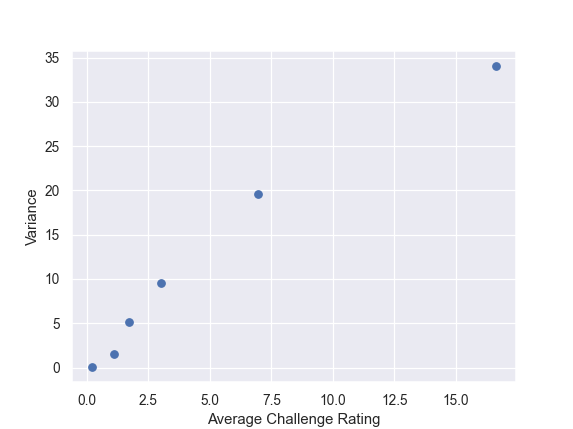

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = averages
y = variances

ax.set_xlabel("Cluster Average Challenge Rating")
ax.set_ylabel("Variance")

ax.scatter(x, y)

plt.show()

<IPython.core.display.Javascript object>


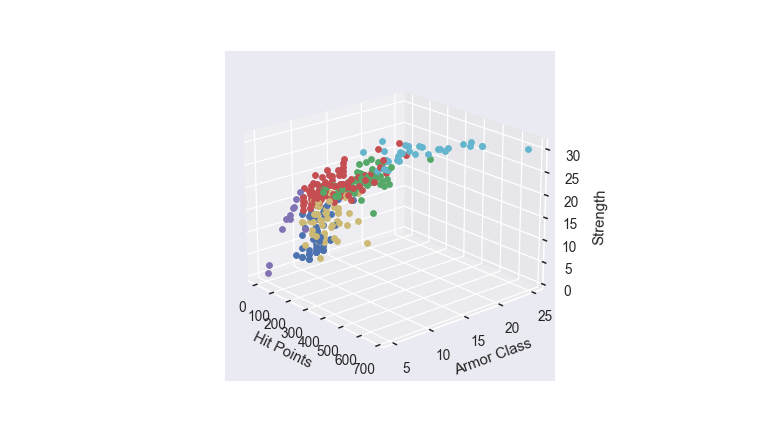

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
colors = ['r','g','b','c','m','y']
for i in range(len(clusters)):
    for j in range(len(clusters[i])):
        x = clusters[i][j][0][-1]
        y = clusters[i][j][0][-2]
        z = clusters[i][j][0][0]

        ax.scatter(x, y, z,c=colors[i])

ax.set_xlabel("Hit Points")
ax.set_ylabel("Armor Class")
ax.set_zlabel("Strength")
plt.show()